# <center>Histogramas</center>

Importamos pandas

In [1]:
import pandas as pd

Creamos nuestro dataframe con `pandas` y el metodo **`read_excel()`** para leer la fuente que está en excel.

In [2]:
df_canada = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Revisamos las primeras cinco filas del dataframe

In [3]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Renombramos algunas columnas

In [4]:
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada.head(2)

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


También agregaremos una columna 'Total' que resume el total de inmigrantes por país durante todo el período 1980 - 2013, de la siguiente manera:

In [5]:
df_canada['Total'] = df_canada.sum(axis=1)

C:\Users\RC\AppData\Local\Temp/ipykernel_8680/317893876.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canada['Total'] = df_canada.sum(axis=1)


Eliminamos algunas columnas innecesarias

In [6]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,18433


Ahora establecemos la columna Country como indice para que sea mas fácil filtrar

In [7]:
df_canada.set_index('Country', inplace=True)
df_canada.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,18433


importamos matplotlib y trazamos el histograma

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

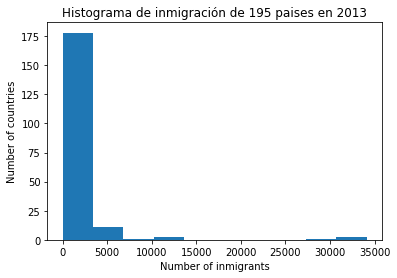

In [10]:
df_canada[2013].plot(kind='hist')

plt.title('Histograma de inmigración de 195 paises en 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of inmigrants')

plt.show()

Podemos observar que los contenedores no estan alineados con las marcas de graduación en el eje horizontal. Esto dificulta la lectura del histograma

Una forma de resolver esto es con la función `histogram` de la libreria Numpy. Asi que importamos matplotlib y numpy

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Llamamos a la función histogram de numpy

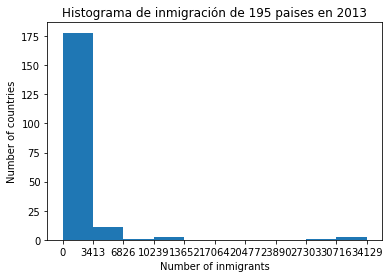

In [12]:
count, bin_edges = np.histogram(df_canada[2013])
df_canada[2013].plot(kind='hist', xticks=bin_edges)

plt.title('Histograma de inmigración de 195 paises en 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of inmigrants')

plt.show()